# TESLA Stock price movement based on time series historical data 

Collecting yahoo finance data

In [1]:
# Download Data from Yahoo finance
!pip install yfinance

Importing Libraries

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import yfinance as yf
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

In [3]:
# Data: downloaded data are daily stock prices for Tesla with code
#       TSLA into a pandas DataFrame with yfinance. The starting date 
#       is 2015-01-01 to end date 2021-02-01
start = '2015-01-01'
end   = '2021-02-01'
df = yf.download('TSLA', start=start, end=end, interval="1d")

[*********************100%***********************]  1 of 1 completed


In [4]:
# Print the head: first five rows of data
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,44.618000,45.136002,44.450001,44.481998,44.481998,11487500
2015-01-02,44.574001,44.650002,42.652000,43.862000,43.862000,23822000
2015-01-05,42.910000,43.299999,41.431999,42.018002,42.018002,26842500
2015-01-06,42.012001,42.840000,40.841999,42.256001,42.256001,31309500
2015-01-07,42.669998,42.956001,41.956001,42.189999,42.189999,14842000


In [5]:
# Detecting missing values
df.isna().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1531 entries, 2014-12-31 to 2021-01-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1531 non-null   float64
 1   High       1531 non-null   float64
 2   Low        1531 non-null   float64
 3   Close      1531 non-null   float64
 4   Adj Close  1531 non-null   float64
 5   Volume     1531 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 83.7 KB


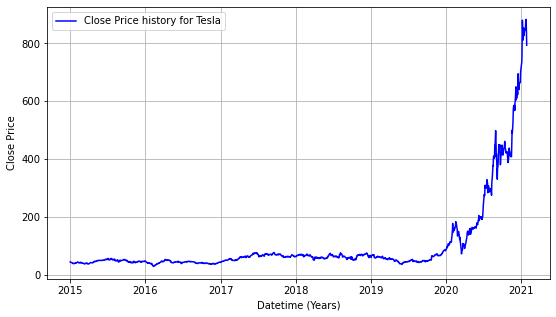

In [7]:
# WE plot the target variable to understand how it’s shaping up in our data
plt.figure(figsize=(9,5))
plt.plot(df['Close'], color='blue', label='Close Price history for Tesla')
plt.xlabel('Datetime (Years)')
plt.ylabel('Close Price')
plt.grid(True)
plt.legend()

In [8]:
# Describe data
df['Close'].describe()

count    1531.000000
mean      102.430104
std       138.381294
min        28.733999
25%        45.579000
50%        57.175999
75%        69.906998
max       883.090027
Name: Close, dtype: float64

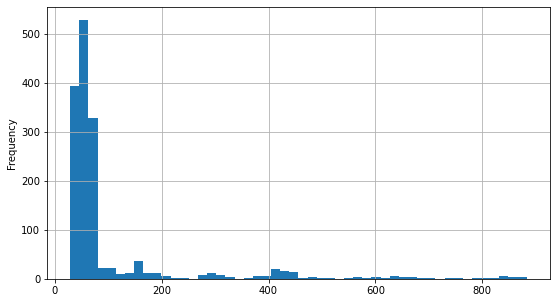

In [9]:
# Histogram for closing
plt.figure(figsize=(9,5))
df['Close'].plot.hist(bins=50)
plt.grid(True)

Close price after 1 days

In [10]:
df['Close_tomorrow'] = df['Close'].shift(-1) 

In [11]:
df

,Open,High,Low,Close,Adj Close,Volume,Close_tomorrow
Date,,,,,,,
2014-12-31,44.618000,45.136002,44.450001,44.481998,44.481998,11487500,43.862000
2015-01-02,44.574001,44.650002,42.652000,43.862000,43.862000,23822000,42.018002
2015-01-05,42.910000,43.299999,41.431999,42.018002,42.018002,26842500,42.256001
2015-01-06,42.012001,42.840000,40.841999,42.256001,42.256001,31309500,42.189999
2015-01-07,42.669998,42.956001,41.956001,42.189999,42.189999,14842000,42.124001
...,...,...,...,...,...,...,...
2021-01-25,855.000000,900.400024,838.820007,880.799988,880.799988,41173400,883.090027
2021-01-26,891.380005,895.900024,871.599976,883.090027,883.090027,23131600,864.159973
2021-01-27,870.349976,891.500000,858.659973,864.159973,864.159973,27334000,835.429993


Close price after 5 days

In [12]:
df['Close_tomorrow_5days'] = df['Close'].shift(-5)

In [13]:
df

,Open,High,Low,Close,Adj Close,Volume,Close_tomorrow,Close_tomorrow_5days
Date,,,,,,,,
2014-12-31,44.618000,45.136002,44.450001,44.481998,44.481998,11487500,43.862000,42.124001
2015-01-02,44.574001,44.650002,42.652000,43.862000,43.862000,23822000,42.018002,41.332001
2015-01-05,42.910000,43.299999,41.431999,42.018002,42.018002,26842500,42.256001,40.442001
2015-01-06,42.012001,42.840000,40.841999,42.256001,42.256001,31309500,42.189999,40.849998
2015-01-07,42.669998,42.956001,41.956001,42.189999,42.189999,14842000,42.124001,38.537998
...,...,...,...,...,...,...,...,...
2021-01-25,855.000000,900.400024,838.820007,880.799988,880.799988,41173400,883.090027,NaN
2021-01-26,891.380005,895.900024,871.599976,883.090027,883.090027,23131600,864.159973,NaN
2021-01-27,870.349976,891.500000,858.659973,864.159973,864.159973,27334000,835.429993,NaN


Percentage change

In [14]:
df['Close_pct_change'] = 100*df['Close'].pct_change()

In [15]:
df

,Open,High,Low,Close,Adj Close,Volume,Close_tomorrow,Close_tomorrow_5days,Close_pct_change
Date,,,,,,,,,
2014-12-31,44.618000,45.136002,44.450001,44.481998,44.481998,11487500,43.862000,42.124001,NaN
2015-01-02,44.574001,44.650002,42.652000,43.862000,43.862000,23822000,42.018002,41.332001,-1.393820
2015-01-05,42.910000,43.299999,41.431999,42.018002,42.018002,26842500,42.256001,40.442001,-4.204090
2015-01-06,42.012001,42.840000,40.841999,42.256001,42.256001,31309500,42.189999,40.849998,0.566421
2015-01-07,42.669998,42.956001,41.956001,42.189999,42.189999,14842000,42.124001,38.537998,-0.156195
...,...,...,...,...,...,...,...,...,...
2021-01-25,855.000000,900.400024,838.820007,880.799988,880.799988,41173400,883.090027,NaN,4.034770
2021-01-26,891.380005,895.900024,871.599976,883.090027,883.090027,23131600,864.159973,NaN,0.259995
2021-01-27,870.349976,891.500000,858.659973,864.159973,864.159973,27334000,835.429993,NaN,-2.143615


Defining a function for labeling movements (2 categories: 1 for up and 0 for down)

In [16]:
def categories(x):
  if x>0:
    return 1
  else:
    return 0

Creating a possible target variable

In [17]:
df['Movement'] = df['Close_pct_change'].apply(categories)

In [18]:
df

,Open,High,Low,Close,Adj Close,Volume,Close_tomorrow,Close_tomorrow_5days,Close_pct_change,Movement
Date,,,,,,,,,,
2014-12-31,44.618000,45.136002,44.450001,44.481998,44.481998,11487500,43.862000,42.124001,NaN,0
2015-01-02,44.574001,44.650002,42.652000,43.862000,43.862000,23822000,42.018002,41.332001,-1.393820,0
2015-01-05,42.910000,43.299999,41.431999,42.018002,42.018002,26842500,42.256001,40.442001,-4.204090,0
2015-01-06,42.012001,42.840000,40.841999,42.256001,42.256001,31309500,42.189999,40.849998,0.566421,1
2015-01-07,42.669998,42.956001,41.956001,42.189999,42.189999,14842000,42.124001,38.537998,-0.156195,0
...,...,...,...,...,...,...,...,...,...,...
2021-01-25,855.000000,900.400024,838.820007,880.799988,880.799988,41173400,883.090027,NaN,4.034770,1
2021-01-26,891.380005,895.900024,871.599976,883.090027,883.090027,23131600,864.159973,NaN,0.259995,1
2021-01-27,870.349976,891.500000,858.659973,864.159973,864.159973,27334000,835.429993,NaN,-2.143615,0


Drop Rows/Columns with Null values 

In [19]:
df = df.dropna()

In [20]:
df

,Open,High,Low,Close,Adj Close,Volume,Close_tomorrow,Close_tomorrow_5days,Close_pct_change,Movement
Date,,,,,,,,,,
2015-01-02,44.574001,44.650002,42.652000,43.862000,43.862000,23822000,42.018002,41.332001,-1.393820,0
2015-01-05,42.910000,43.299999,41.431999,42.018002,42.018002,26842500,42.256001,40.442001,-4.204090,0
2015-01-06,42.012001,42.840000,40.841999,42.256001,42.256001,31309500,42.189999,40.849998,0.566421,1
2015-01-07,42.669998,42.956001,41.956001,42.189999,42.189999,14842000,42.124001,38.537998,-0.156195,0
2015-01-08,42.562000,42.759998,42.001999,42.124001,42.124001,17212500,41.332001,38.374001,-0.156431,0
...,...,...,...,...,...,...,...,...,...,...
2021-01-15,852.000000,859.900024,819.099976,826.159973,826.159973,38777600,844.549988,880.799988,-2.229589,0
2021-01-19,837.799988,850.000000,833.000000,844.549988,844.549988,25367000,850.450012,883.090027,2.225963,1
2021-01-20,858.739990,859.500000,837.280029,850.450012,850.450012,25665900,844.989990,864.159973,0.698600,1


Checking the distribution of the movements

In [21]:
df['Movement'].value_counts()/len(df)

1    0.518689
0    0.481311
Name: Movement, dtype: float64

Pairwise correlation of all columns in the dataframe

In [22]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume,Close_tomorrow,Close_tomorrow_5days,Close_pct_change,Movement
Open,1.000000,0.999588,0.999489,0.999107,0.999107,0.260352,0.997714,0.992670,0.076543,0.064822
High,0.999588,1.000000,0.999373,0.999645,0.999645,0.268963,0.998166,0.992961,0.087302,0.070737
Low,0.999489,0.999373,1.000000,0.999490,0.999490,0.251636,0.998320,0.993145,0.085900,0.071456
Close,0.999107,0.999645,0.999490,1.000000,1.000000,0.261366,0.998473,0.993126,0.098092,0.078090
Adj Close,0.999107,0.999645,0.999490,1.000000,1.000000,0.261366,0.998473,0.993126,0.098092,0.078090
Volume,0.260352,0.268963,0.251636,0.261366,0.261366,1.000000,0.257892,0.257229,0.104517,0.034824
Close_tomorrow,0.997714,0.998166,0.998320,0.998473,0.998473,0.257892,1.000000,0.994576,0.096965,0.077504
Close_tomorrow_5days,0.992670,0.992961,0.993145,0.993126,0.993126,0.257229,0.994576,1.000000,0.096113,0.078476
Close_pct_change,0.076543,0.087302,0.085900,0.098092,0.098092,0.104517,0.096965,0.096113,1.000000,0.671853
Movement,0.064822,0.070737,0.071456,0.078090,0.078090,0.034824,0.077504,0.078476,0.671853,1.000000


Adding constant in dataframe(help me to showcase intercept in regression )

In [23]:
df = sm.add_constant(df)

In [24]:
df

,const,Open,High,Low,Close,Adj Close,Volume,Close_tomorrow,Close_tomorrow_5days,Close_pct_change,Movement
Date,,,,,,,,,,,
2015-01-02,1.0,44.574001,44.650002,42.652000,43.862000,43.862000,23822000,42.018002,41.332001,-1.393820,0
2015-01-05,1.0,42.910000,43.299999,41.431999,42.018002,42.018002,26842500,42.256001,40.442001,-4.204090,0
2015-01-06,1.0,42.012001,42.840000,40.841999,42.256001,42.256001,31309500,42.189999,40.849998,0.566421,1
2015-01-07,1.0,42.669998,42.956001,41.956001,42.189999,42.189999,14842000,42.124001,38.537998,-0.156195,0
2015-01-08,1.0,42.562000,42.759998,42.001999,42.124001,42.124001,17212500,41.332001,38.374001,-0.156431,0
...,...,...,...,...,...,...,...,...,...,...,...
2021-01-15,1.0,852.000000,859.900024,819.099976,826.159973,826.159973,38777600,844.549988,880.799988,-2.229589,0
2021-01-19,1.0,837.799988,850.000000,833.000000,844.549988,844.549988,25367000,850.450012,883.090027,2.225963,1
2021-01-20,1.0,858.739990,859.500000,837.280029,850.450012,850.450012,25665900,844.989990,864.159973,0.698600,1


Defining independent valuables and dependent variable of Regression

In [25]:
x = df[['const','Open','High','Low','Close','Volume']]

In [26]:
x

,const,Open,High,Low,Close,Volume
Date,,,,,,
2015-01-02,1.0,44.574001,44.650002,42.652000,43.862000,23822000
2015-01-05,1.0,42.910000,43.299999,41.431999,42.018002,26842500
2015-01-06,1.0,42.012001,42.840000,40.841999,42.256001,31309500
2015-01-07,1.0,42.669998,42.956001,41.956001,42.189999,14842000
2015-01-08,1.0,42.562000,42.759998,42.001999,42.124001,17212500
...,...,...,...,...,...,...
2021-01-15,1.0,852.000000,859.900024,819.099976,826.159973,38777600
2021-01-19,1.0,837.799988,850.000000,833.000000,844.549988,25367000
2021-01-20,1.0,858.739990,859.500000,837.280029,850.450012,25665900


In [27]:
y = df['Movement']

In [28]:
y

Date
2015-01-02    0
2015-01-05    0
2015-01-06    1
2015-01-07    0
2015-01-08    0
             ..
2021-01-15    0
2021-01-19    1
2021-01-20    1
2021-01-21    0
2021-01-22    1
Name: Movement, Length: 1525, dtype: int64

Defining model

In [29]:
model = sm.Logit(y,x)

In [30]:
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.545356
         Iterations 8


Print the summary

In [31]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Movement   No. Observations:                 1525
Model:                          Logit   Df Residuals:                     1519
Method:                           MLE   Df Model:                            5
Date:                Fri, 19 Feb 2021   Pseudo R-squ.:                  0.2124
Time:                        18:23:14   Log-Likelihood:                -831.67
converged:                       True   LL-Null:                       -1056.0
Covariance Type:            nonrobust   LLR p-value:                 9.691e-95
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2580      0.128     -2.008      0.045      -0.510      -0.006
Open          -0.4912      0.060     -8.220      0.000      -0.608      -0.374
High          -0.2490      0.074     -3.373      0.001      -0.394      -0.104
Low           -0.3231      0.065     -4.999      0.000      -0.450      -0.196
Close          1.0667      0.087     12.291      0.000       0.897       1.237
Volume      6.257e-10   3.19e-09      0.196      0.845   -5.63e-09    6.89e-09
==============================================================================
"""

Make Prediction

In [32]:
prediction = result.predict(x)

In [33]:
prediction

Date
2015-01-02    4.374656e-01
2015-01-05    3.387677e-01
2015-01-06    5.827695e-01
2015-01-07    3.873144e-01
2015-01-08    3.916124e-01
                  ...     
2021-01-15    8.457167e-08
2021-01-19    9.997441e-01
2021-01-20    6.295294e-01
2021-01-21    2.070275e-02
2021-01-22    9.999993e-01
Length: 1525, dtype: float64

Comparing actual value and predicted values using confusion matrix

In [34]:
#start creating function 
def confusion_matrix(act,pred ):
    predtrans = ['Up' if i>0.5 else "Down" for i in pred]
    actuals = ['Up' if i>0 else "Dawn" for i in act]
    confusion_matrix = pd.crosstab(pd.Series(actuals),pd.Series(predtrans),rownames=['Actual'],colnames=['Predicted'])
    return confusion_matrix

In [35]:
confusion_matrix(y,prediction)

Predicted,Down,Up
Actual,,
Dawn,591,143
Up,153,638


How many observations  we have in the dataframe

In [36]:
len(df)  

1525

Calculating Accuracy

In [37]:
(591+638)/1525

0.8059016393442623

In [38]:
# confirming the result for training ad testing the model
# train_size = int(len(df)*0.8)
train_size = 1250

In [39]:
#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)

In [40]:
# splitting the dataset without shuffling
train = data[:train_size]
test = data[train_size:]

In [41]:
# shapes of training set
print('\n Shape of training set:')
print(train.shape)


 Shape of training set:
(1250, 11)


In [42]:
# shapes of testing set
print('\n Shape of validation set:')
print(test.shape)


 Shape of validation set:
(275, 11)


In [43]:
x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_test = test.drop('Close', axis=1)
y_test = test['Close']

Implement linear regression

In [44]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
result = model.fit(x_train,y_train)

In [45]:
# Accuracy:
import sklearn.metrics as sm

In [46]:
#make predictions and find the rmse : mean square error
preds = model.predict(x_test)
rms = (np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
print("Mean square error =",rms)

Mean square error = 1.385968140699201e-25


In [47]:
#make predictions and find the rmse : Root mean square error
preds = model.predict(x_test)
rms = np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
print("Root mean square error =",rms)

Root mean square error = 3.72285930529103e-13


In [48]:
#  Median square error
rms = np.sqrt(np.median(np.power((np.array(y_test)-np.array(preds)),2)))
print("Median absolute error =",rms)

Median absolute error = 2.2737367544323206e-13


In [49]:
# Final predictions
test['Predictions'] = 0
test['Predictions'] = preds
test.index = data[1250:].index
train.index = data[:1250].index

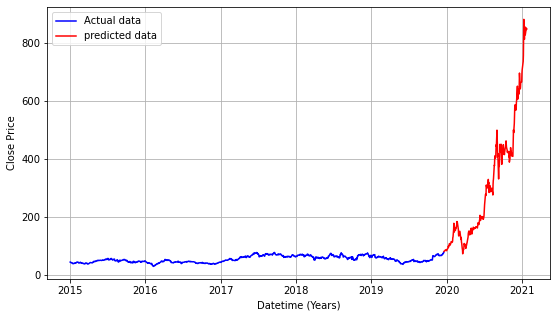

In [51]:
# Final data visualization
plt.figure(figsize=(9,5))
plt.plot(train['Close'] , color='blue', label='Actual data')
plt.plot(test['Predictions'] , color='red', label='predicted data')

# color='blue', label='Close Price history')
plt.xlabel('Datetime (Years)')
plt.ylabel('Close Price')

plt.grid(True)
plt.legend()